[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_11_Regressao_Linear.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_11_Regressao_Linear.ipynb)

# Regressão Linear

**Objetivos**: Aprender o que é Regressão Linear e introduzir intuições sobre o Método do Gradiente e o Método do Gradiente Estocástico assim como os problemas de regressão de aprendizagem de máquina. Apresentar a biblioteca `SciKit-Learn`.

## Defininição - Regressão Linear

> Uma regressão linear faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

<img src="images/reg-linear.png" alt="reg-linear" style="width: 400px;"/>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros}$

## Métricas de Desempenho de uma Regressão

<img src="images/erro-reg.png" alt="erro-reg" style="width: 400px;"/>

### *Mean Squared Error* (MSE) - Erro Quadrático Médio

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

<img src="images/gradient-descent.gif" alt="gradient-descent-animation" style="width: 500px;"/>

<img src="images/gradient-descent-2.gif" alt="gradient-descent-animation" style="width: 500px;"/>

## Exemplo com o dataset [Boston House Prices](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)


* $N = 506$
* Atributos: 13
    * `CRIM` crime per capita da região
    * `ZN` proporção de terra residencial
    * `INDUS` proporção terra comercial não-varejista
    * `CHAS` *Dummy* se fica as margens do Charles River (1 ou 0)
    * `NOX` concentração de óxido nítrico (partes por 10 milhões)
    * `RM` número de quartos
    * `AGE` idade da residência
    * `DIS` distância dos cinco centros de emprego de Boston
    * `RAD` acessibilidade às rodovias radiais
    * `TAX` valor do IPTU por 10,000 USD
    * `PTRATIO` relação aluno-professor (*pupil-teacher ratio*) da região
    * `B` proporção de afro-descendentes na região
    * `LSTAT` porcentagem de população de baixa-renda
* Variável resposta: valor da casa por 10,000 USD

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
y = boston['target']

In [2]:
print('Nomes dos Atributos: ', boston['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Tamanho de X:  (506, 13) 

Tamanho de y:  (506,) 



### Quebrando dataset em `train` e `test`

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [4]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (379, 13) 

Tamanho de X_test:  (127, 13) 

Tamanho de y_train:  (379,) 

Tamanho de y_test:  (127,) 



### Regressão Linear
Usar a função do Scikit-Learn [`sklearn.linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

#### Argumentos:
* `loss` - `str`
    * MSE - `'squared_loss'`
    * MAE - `'epsilon_insensitive'`
* `max_iter` - `int` - Número máximo de iterações do *Gradient Descent*
* `tol` - Tolerância - Critério de parada de treino
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)
* `eta0` - `float` - Taxa de aprendizagem inicial
    * padrão `0.01`
* `learning_rate` - `str` - Taxa de aprendizagem
    * Constante - `'constant'`
    * Adapatativa - `'adaptive'`
* `n_iter_no_change` - `int` - Somente se usar Taxa de Aprendizagem Adaptativa

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [5]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss='squared_loss', learning_rate='constant', max_iter=10,
                   eta0=0.01, verbose=1, tol=None, random_state=123)

### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X`
    * `y`
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

In [6]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 8536459609585.63, NNZs: 13, Bias: -71934749050.291260, T: 379, Avg. loss: 2101086349192392031772136701952.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 11139670311831.62, NNZs: 13, Bias: -61934749050.291260, T: 758, Avg. loss: 2193272863063904930530368421888.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8399272905155.67, NNZs: 13, Bias: -71934749050.291260, T: 1137, Avg. loss: 2202852818526744015180300025856.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8668374748731.92, NNZs: 13, Bias: -61934749050.291260, T: 1516, Avg. loss: 2051232878754990729154904719360.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7628649591511.44, NNZs: 13, Bias: -111934749050.291260, T: 1895, Avg. loss: 2129419028677382508885707849728.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9935320540360.65, NNZs: 13, Bias: -161934749050.291260, T: 2274, Avg. loss: 2085108476758519611426879832064.000000
Total training time: 0.00 seconds.
-- 

SGDRegressor(learning_rate='constant', max_iter=10, random_state=123, tol=None,
             verbose=1)

In [7]:
clf.coef_.tolist()

[521651325706.6274,
 1479542295803.8472,
 3831768057720.7256,
 159563221238.50052,
 -18369203160.469345,
 -1194585001511.8408,
 3522021224217.425,
 -743550607894.5062,
 1859636444.5988407,
 3860147118889.9033,
 -3795951699095.441,
 -1616019044369.043,
 1794137959774.2043]

In [8]:
# Coeficientes do modelo
for feature, coef in zip(boston['feature_names'].tolist(), clf.coef_.tolist()):
    print(f"{feature}: {int(coef)}")

# Constante do modelo
print(f"Constante: {int(clf.intercept_)}")

CRIM: 521651325706
ZN: 1479542295803
INDUS: 3831768057720
CHAS: 159563221238
NOX: -18369203160
RM: -1194585001511
AGE: 3522021224217
DIS: -743550607894
RAD: 1859636444
TAX: 3860147118889
PTRATIO: -3795951699095
B: -1616019044369
LSTAT: 1794137959774
Constante: -143449561952


### Erro do Modelo

Erro do Modelo é $\pm \sqrt{MSE}$

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±1273604802366119


### Efeito da Taxa de Aprendizagem $\eta$

-- Epoch 1
Norm: 0.07, NNZs: 13, Bias: 0.000377, T: 379, Avg. loss: 54.375035
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 13, Bias: 0.000635, T: 758, Avg. loss: 48.765088
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 13, Bias: 0.000933, T: 1137, Avg. loss: 49.644970
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 13, Bias: 0.001194, T: 1516, Avg. loss: 46.052435
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.10, NNZs: 13, Bias: 0.001449, T: 1895, Avg. loss: 47.879578
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 13, Bias: 0.001696, T: 2274, Avg. loss: 43.626800
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.13, NNZs: 13, Bias: 0.001921, T: 2653, Avg. loss: 44.911426
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.14, NNZs: 13, Bias: 0.002181, T: 3032, Avg. loss: 44.979721
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.15, NNZs: 13, Bias: 0.002404, T: 3411, Avg. loss: 45.611536
Total train

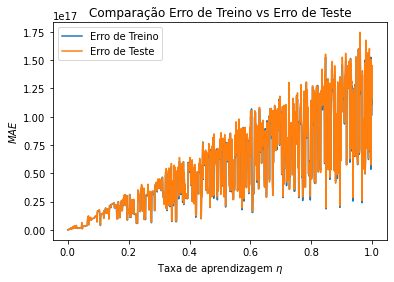

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# inicia duas listas vazias
mae_train_values = []
mae_test_values = []

# Eixo X do grafico
x_axis = np.linspace(1e-6, 1, 1000)

for i in x_axis:
    clf =  clf.set_params(eta0=i)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_values.append(mae_train)
    
    y_test_pred = clf.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_values.append(mae_test)
    

plt.plot(x_axis, mae_train_values, label='Erro de Treino')
plt.plot(x_axis, mae_test_values, label='Erro de Teste')
plt.xlabel('Taxa de aprendizagem $\eta$')
plt.ylabel('$MAE$')
plt.legend()
plt.title('Comparação Erro de Treino vs Erro de Teste')
plt.show()

### Efeito do Número de Iterações

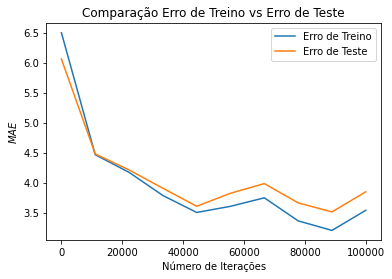

In [13]:
# inicia duas listas vazias
mae_train_values = []
mae_test_values = []

# Eixo X do grafico
x_axis = np.linspace(10, 100000, 10)

for i in x_axis:
    clf.set_params(max_iter=i, eta0=1e-7, verbose=0)  # 0.0000007
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_values.append(mae_train)
    
    y_test_pred = clf.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_values.append(mae_test)
    

plt.plot(x_axis, mae_train_values, label='Erro de Treino')
plt.plot(x_axis, mae_test_values, label='Erro de Teste')
plt.xlabel('Número de Iterações')
plt.ylabel('$MAE$')
plt.legend()
plt.title('Comparação Erro de Treino vs Erro de Teste')
plt.show()

## Atividade - Regressão com o dataset [Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

* $N = 442$
* Atributos: 10
    * `age`
    * `sex`
    * `bmi` Índice de Massa Corpórea (IMC) - *Body Mass Index* (BMI)
    * `bp` pressão arterial média *blood pressure* (bp)
    * `s1` colesterol total
    * `s2` colesterol LDL
    * `s3` colesterol HDL
    * `s4` colesterol VLDL
    * `s5` triglicerides
    * `s6` glicose
* Variável dependente: medida quantitativa de progressão da diabetes

* Achar o melhor `eta0` e os respectivos coeficientes dos atributos ($\theta_i$) e viés/constante ($\theta_0$)

>Obs: usar `test_size = 0.25` e `random_state = 123`

In [14]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

In [15]:
print('Nomes dos Atributos: ', diabetes['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

Tamanho de X:  (442, 10) 

Tamanho de y:  (442,) 



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [17]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (331, 10) 

Tamanho de X_test:  (111, 10) 

Tamanho de y_train:  (331,) 

Tamanho de y_test:  (111,) 

